## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
df_wine = pd.read_csv('/content/winequality-red.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Understanding

**Struktur Data**

In [ ]:
print("\nJumlah baris dan kolom: ")
df_wine.shape


Jumlah baris dan kolom: 


(1599, 12)

**Menghitung ukuran dataset**

In [ ]:
df_wine.size

19188

**Mengecek informasi dataset**

In [ ]:
print("\nInformasi Dataset :")
df_wine.info()


Informasi Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* Tipe data pada dataset terdiri dari *float64* dan *int64* hal tersebut menunjukkan bahwa dataset data numerik.
* Terdapat satu kolom target yaitu quality.

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Mengecek missing values**

In [ ]:
print("\nJumlah data yang hilang :")
print(df_wine.isnull().sum())


Jumlah data yang hilang :
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Tidak terdapat missing values atau data yang hilang pada dataset tersebut.

**Mengecek data duplikat**

In [ ]:
print("\nJumlah data duplikat :")
print(df_wine.duplicated().sum())


Jumlah data duplikat :
240


Terdapat data duplikat sebanyak 240 dan harus dilakukan pembersihan data yang duplikat.

**Mencecek nilai unik**

In [ ]:
df_wine['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


Sebagian besar data terkonsentrasi pada quality 5 dan 6, kemudian diikuti oleh 7. Quality lebih rendah yaitu 3 dan 4 serta quality yang lebih tinggi yaitu 8 memiliki jumlah sampel yang jauh lebih sedikit.

### Exploratory Data Analysis

**Univariate Analysis**

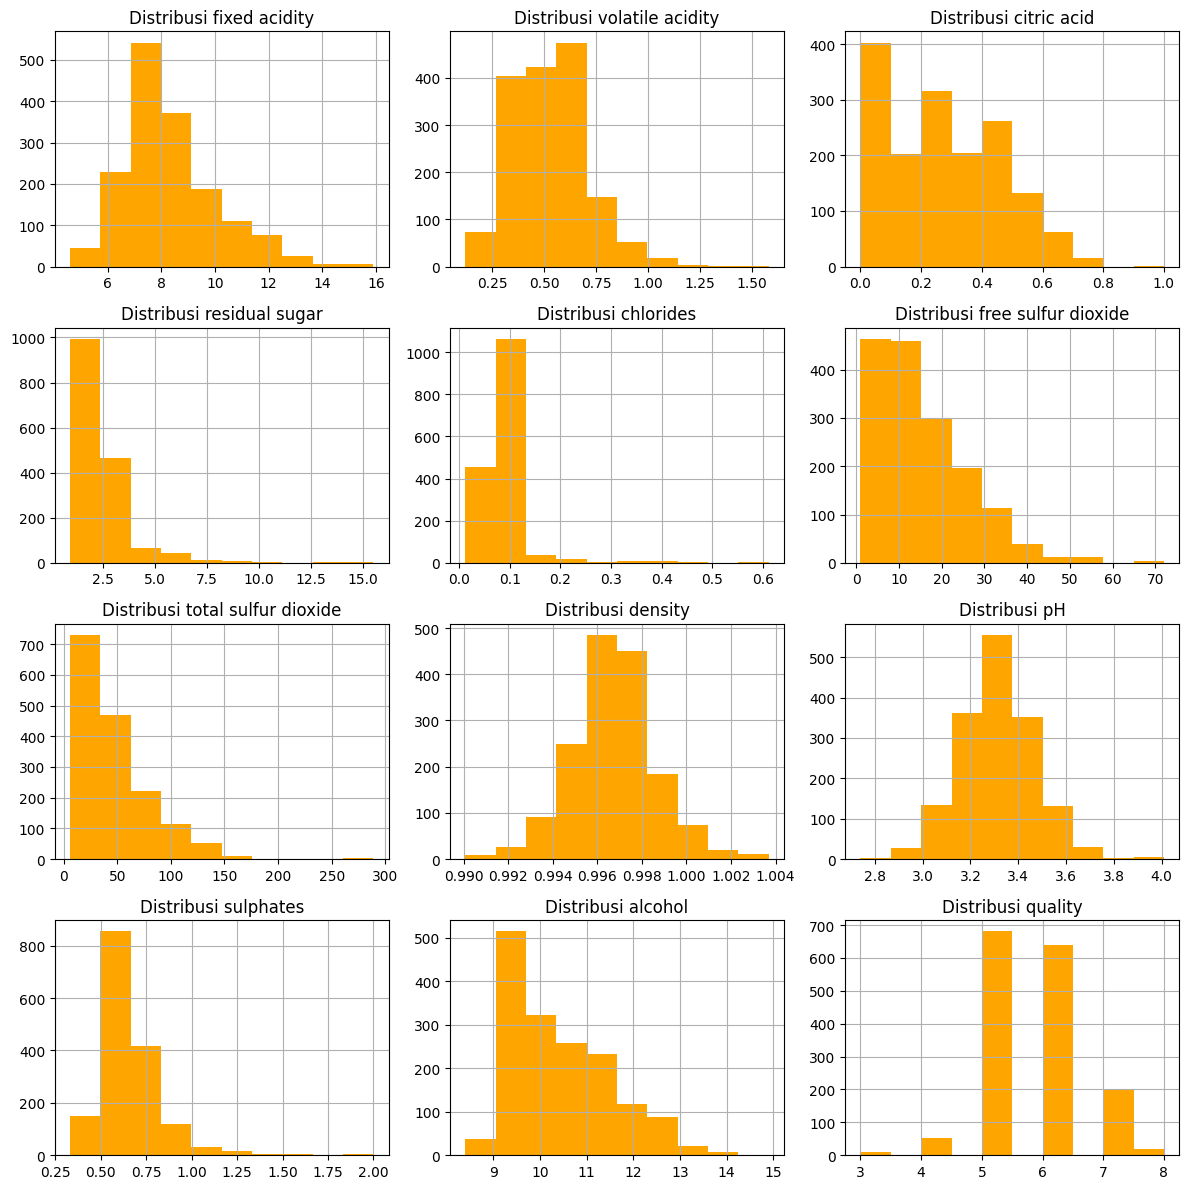

In [ ]:
import os
import math
import matplotlib.pyplot as plt
import pandas as pd

n_cols = 3

n_rows = math.ceil(len(df_wine.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))

axes = axes.flatten()

for i, col in enumerate(df_wine.columns):
  df_wine[col].hist(bins=10, ax=axes[i], color='orange')
  axes[i].set_title(f'Distribusi {col}')

for j in range(i + 1, len(axes)):
  fig.plt.delaxes(axes[j])

plt.tight_layout()
plt.show()

Berdasarkan distribusi diatas, terdapat beberapa fitur seperti *density* dan *pH* memiliki bentuk distribusi yang normal. Akan tetapi pada fitur lainnya, seperti *alcohol*, *residual sugar* memiliki skewed ke kanan dan fitur seperti *chlorides* memiliki skewed ke kiri.

**Bivariete Analysis**

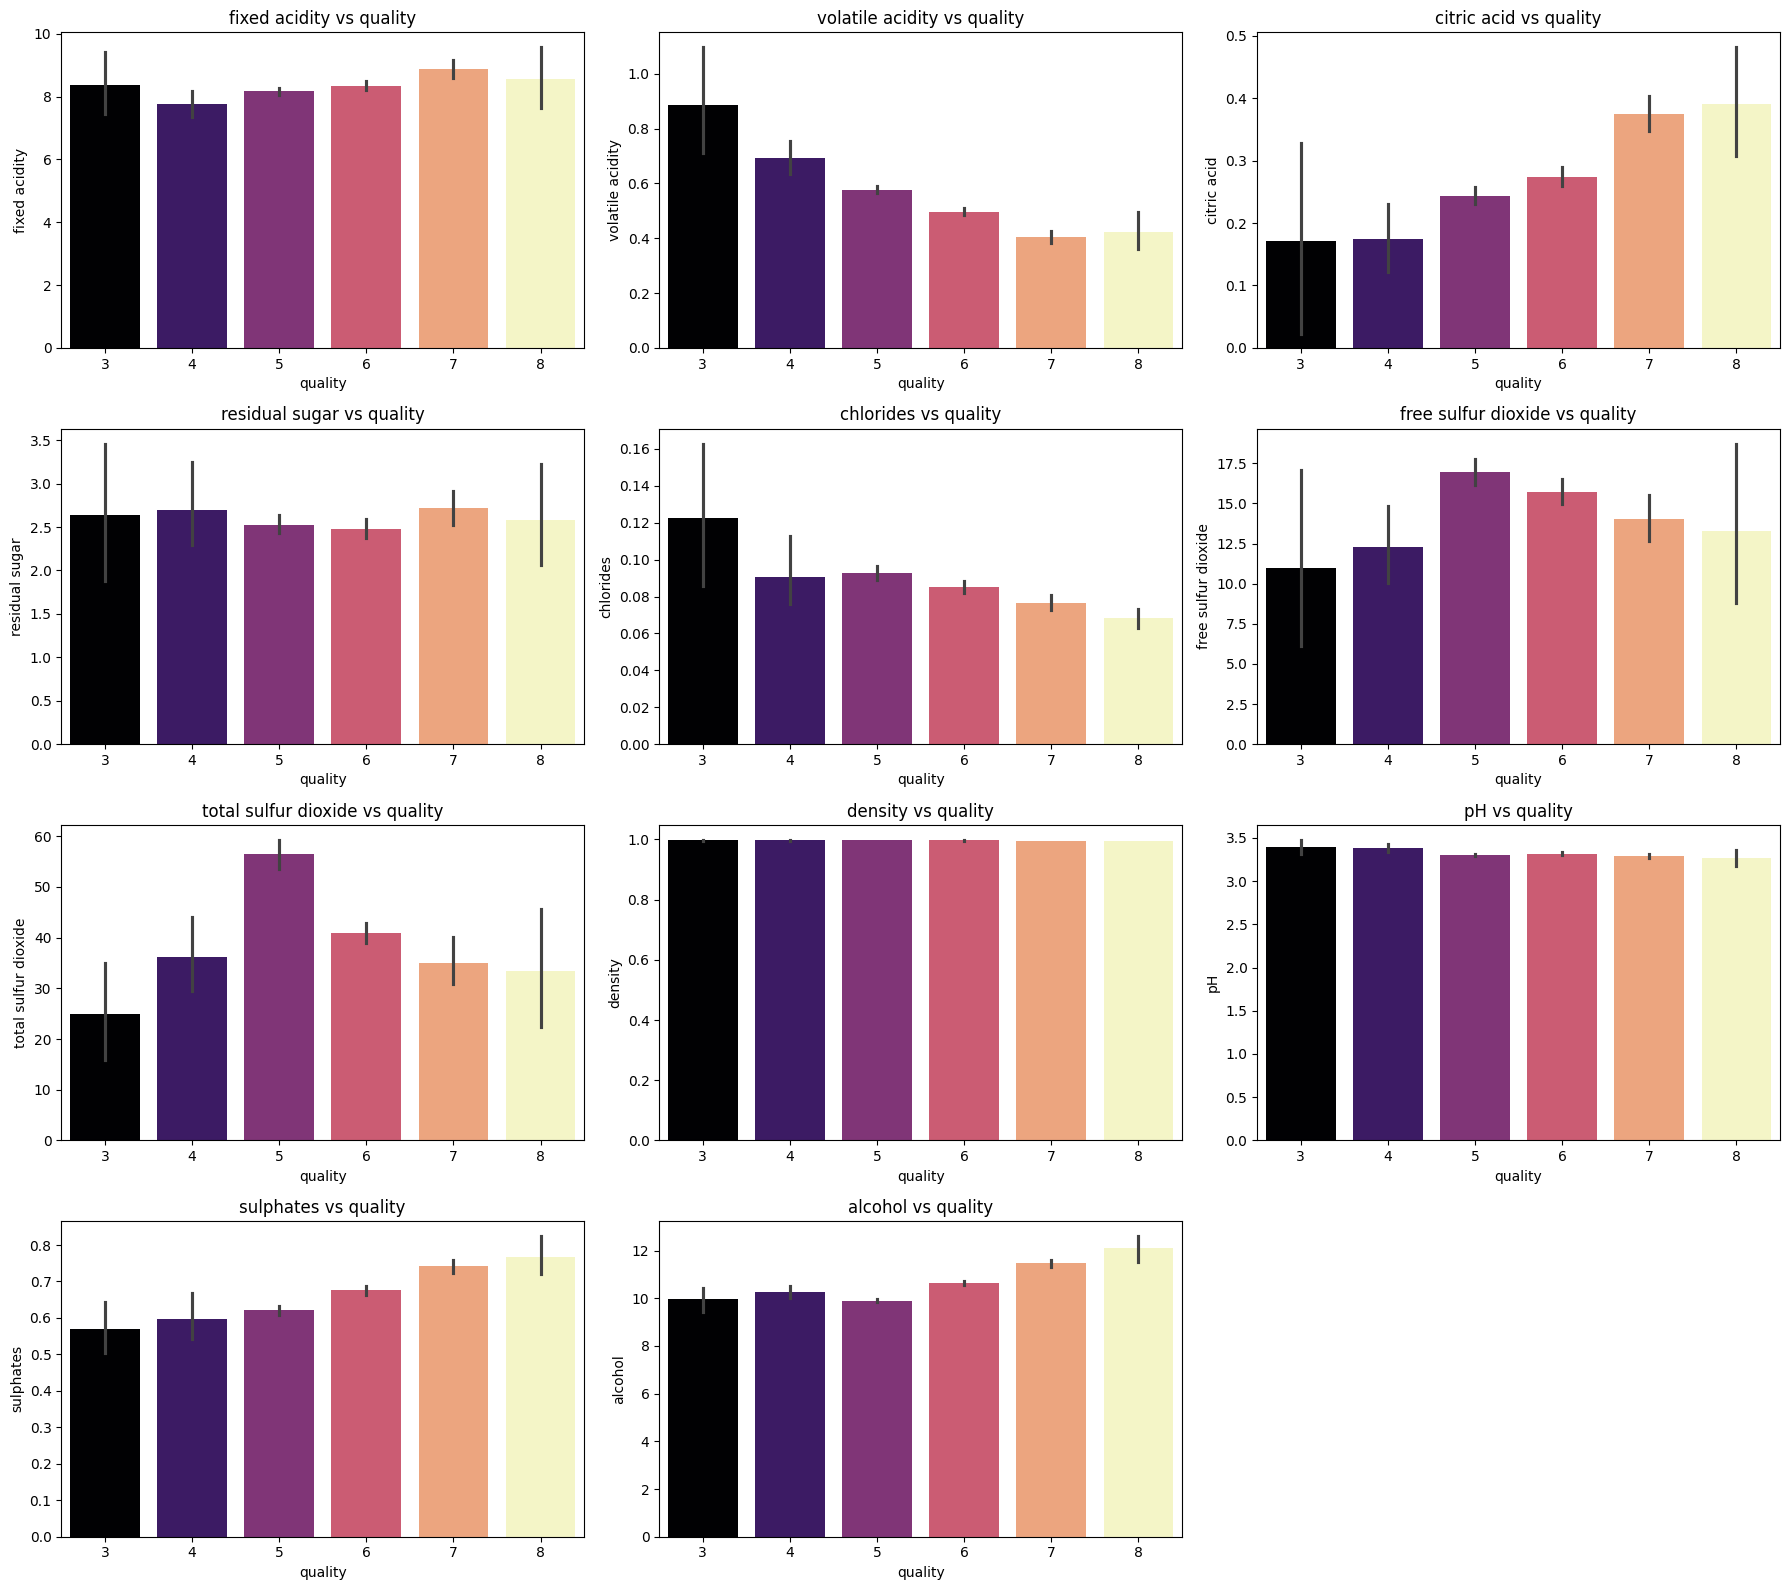

In [ ]:
n_cols = 3

n_rows = math.ceil((len(df_wine.columns) - 1) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))

axes = axes.flatten()

cols = [col for col in df_wine.columns if col != 'quality']

for i, col in enumerate(cols):
  sns.barplot(x='quality', y=col, data=df_wine, ax=axes[i], hue='quality', palette='magma', legend=False)
  axes[i].set_title(f'{col} vs quality')

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Pada diagram diatas, dapat dilihat bahwa beberapa fitur seperti *alcohol*, *sulphates*, *citric acid* dan *volatile acidity* sangat mempengaruhi kualitas anggur antara baik atau buruk.

**Memeriksa Outlier**

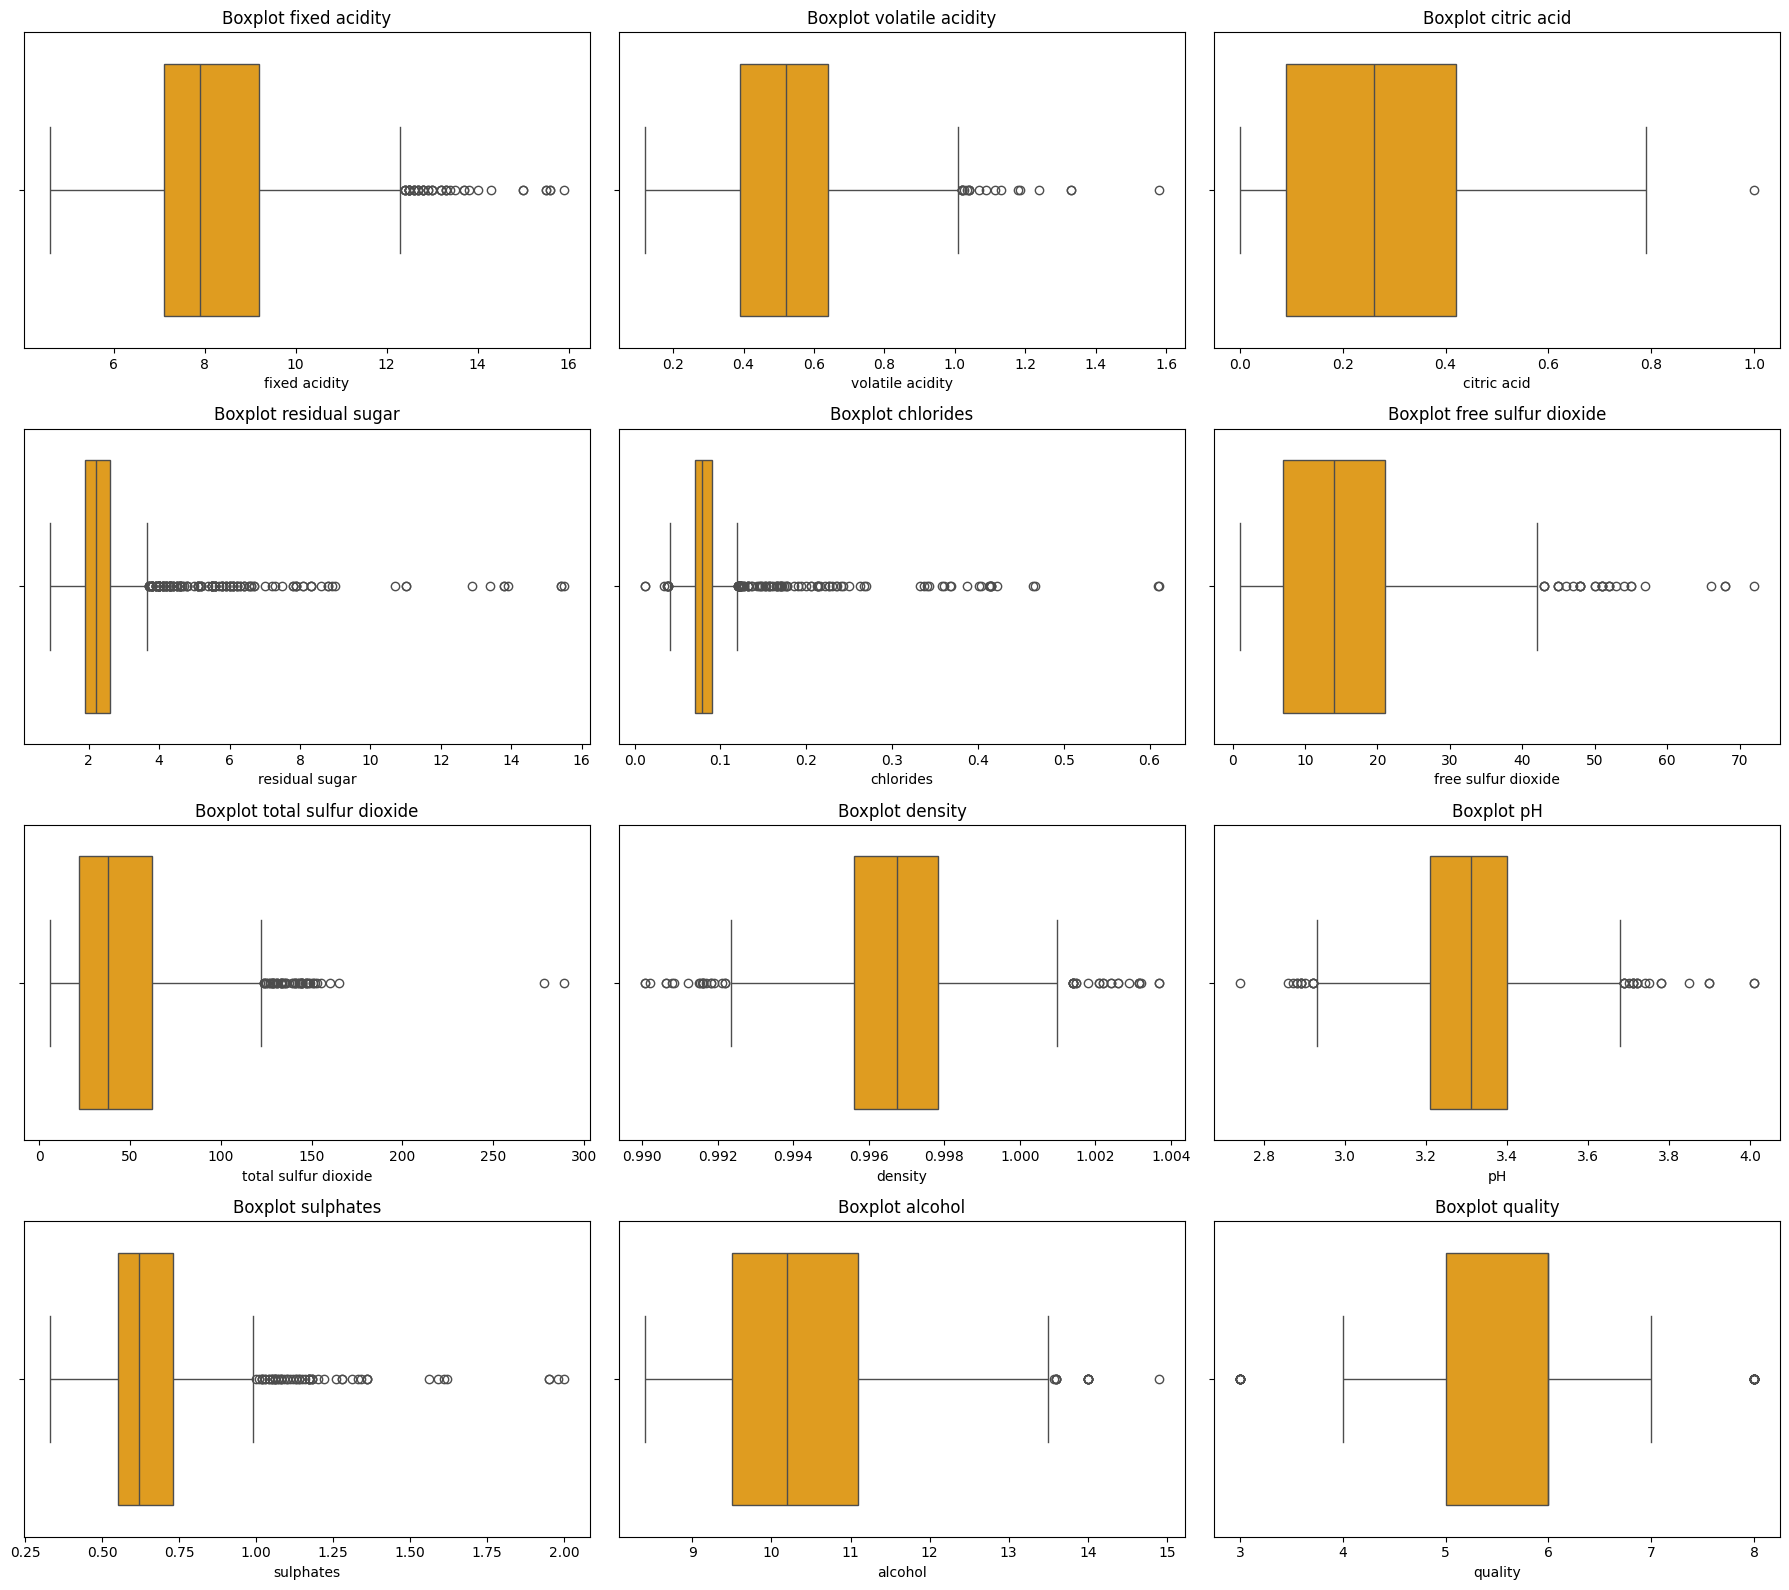

In [ ]:
n_cols = 3

n_rows = math.ceil(len(df_wine.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))

axes = axes.flatten()

for i, col in enumerate(df_wine.columns):
  sns.boxplot(x=col, data=df_wine, ax=axes[i], color='orange')
  axes[i].set_title(f'Boxplot {col}')

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Boxplot diatas menunjukkan bahwa terdapat beberapa fitur seperti *alcohol* atau *sulphates* memiliki outlier. Maka dari itu perlu dilakukan penganganan outlier pada data processing.

**Correlation Matrix**

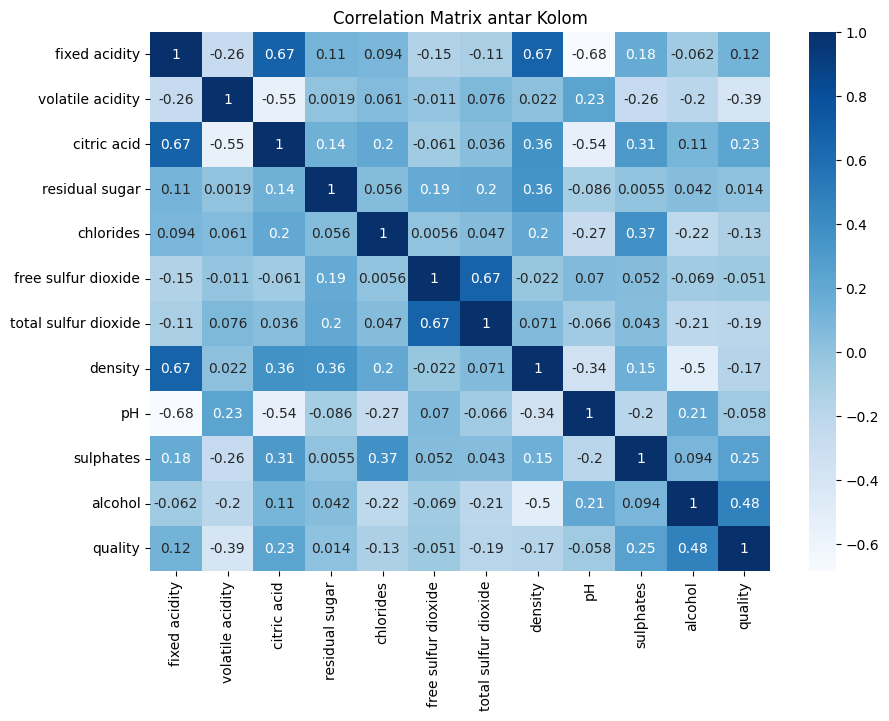

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_wine.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix antar Kolom')
plt.show()

Berdasarkan correlation matrix diatas, ditunjukkan bahwa fitur seperti *alcohol* dan *sulphates* memiliki korelasi yang tinggi terhadap kualitas anggur.

### Insight

Dataset *red wine* memiliki data yang cukup bersih tanpa adanya missing values, akan tetapi memerlukan penanganan data duplikat dan outlier. Distribusi fitur bervariasi dan terdapat beberapa fitur kunci seperti *alcohol, sulphates, citric acid dan volatile acidity* menunjukkan hubungan yang kuat dengan quality anggur.

## Data Preparation

**Menghapus Data Duplikat**

In [ ]:
df_cleaned = df_wine.copy()

df_cleaned = df_cleaned.drop_duplicates()

In [ ]:
print("\nJumlah data duplikat yang sudah dihapus : ")
print(df_cleaned.duplicated().sum())


Jumlah data duplikat yang sudah dihapus : 
0


**Menangani Outlier**

In [ ]:
corr = df_wine.corr()['quality'].sort_values(ascending=False)
corr.head(12)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


In [ ]:
cols_select = corr[abs(corr) > 0.2].index.tolist()
cols_select.remove('quality')
cols_select

['alcohol', 'sulphates', 'citric acid', 'volatile acidity']

In [ ]:
for i in cols_select:
  Q1 = df_cleaned[i].quantile(0.25)
  Q3 = df_cleaned[i].quantile(0.75)
  IQR = Q3 - Q1
  df_cleaned = df_cleaned[~((df_cleaned[i] < (Q1 - 1.5 * IQR)) | (df_cleaned[i] > (Q3 + 1.5 * IQR)))]

**Transformasi Variabel Quality**

In [ ]:
df_cleaned['quality'] = pd.cut(df_cleaned['quality'], bins=[0, 4, 6, 10], labels=['buruk', 'sedang', 'baik'])
df_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,sedang
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,sedang
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,sedang
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,sedang
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,sedang


In [ ]:
df_cleaned['quality'].value_counts()

,count
quality,
sedang,1050
baik,167
buruk,51


In [ ]:
df_cleaned['quality'] = df_cleaned['quality'].map({'buruk' : 0, 'sedang': 1, 'baik' : 2})

In [ ]:
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


**Split Data**

In [ ]:
X = df_cleaned.drop('quality', axis=1)
y = df_cleaned['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=14)

**Standardisasi Fitur**

In [ ]:
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

### Insight


*   Menghapus 240 data duplikat. Hal ini merupakan langkah penting karena data duplikat dapat menyebabkan bias pada model dan memberikan bobot yang tidak proposional pada sampel yang berulang.
*   Menggunakan korelasi terhadap kolom *quality* sebagar langkah awal untuk memiliki fitur yang akan ditangani outliernya. Dengan memilih kolom yang memiliki korelasi absolut di atas 0.2.
*   Menggunakan metode IQR untuk mendeteksi dan menghapus outlier. Dengan menghapus baris yang mengandung outlier.
*   Mengklasifikasikan variabel quality menjadi tiga kategori yaitu buruk, sedang dan baik. Kemudian melakukana encoding kategori-kategori tersebut menjadi nilai numerik seperti 0, 1, dan 2.
*   Dataset yang sudah bersih dibagi menjadi data training dan data testing dengan perbandingan 80% dan 20%.
*   Menggunakan StandardScaler untuk menstrandarisasi fitur pada data training dan data testing. Standardisasi ini bertujuan untuk mengubah nilai fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.



## Modelling

**Model KNN**

In [ ]:
y_predict_list = []

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
y_predict_list.append(y_predict)

print(f'Accuracy Score : {accuracy_score(y_test, y_predict)}')

print(f'Confusion Matrix : \n{confusion_matrix(y_test, y_predict)}')

print(f'Classification Report : \n{classification_report(y_test, y_predict)}')

Accuracy Score : 0.84251968503937
Confusion Matrix : 
[[  0   8   0]
 [  2 204  13]
 [  1  16  10]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.93      0.91       219
           2       0.43      0.37      0.40        27

    accuracy                           0.84       254
   macro avg       0.44      0.43      0.44       254
weighted avg       0.82      0.84      0.83       254



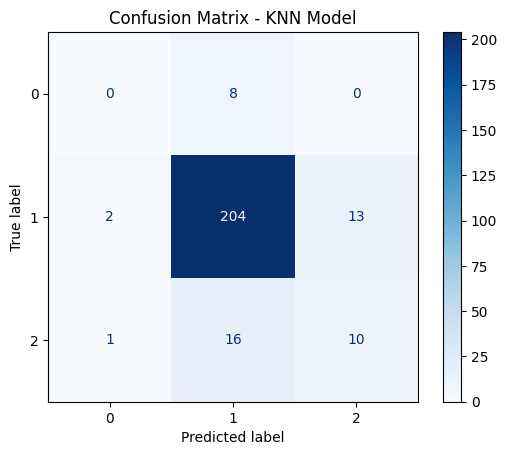

In [ ]:
cm_knn = confusion_matrix(y_test, y_predict_list[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN Model')
plt.show()

**Model SVC**

In [ ]:
from sklearn.svm import  SVC

svc_model = SVC(C=0.1, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
y_predict_list.append(y_predict)

print(f'Accuracy Score : {accuracy_score(y_test, y_predict)}')

print(f'Confusion Matrix : \n{confusion_matrix(y_test, y_predict)}')

print(f'Classification Report : \n{classification_report(y_test, y_predict, zero_division=0)}')

Accuracy Score : 0.8622047244094488
Confusion Matrix : 
[[  0   8   0]
 [  0 219   0]
 [  0  27   0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.86      1.00      0.93       219
           2       0.00      0.00      0.00        27

    accuracy                           0.86       254
   macro avg       0.29      0.33      0.31       254
weighted avg       0.74      0.86      0.80       254



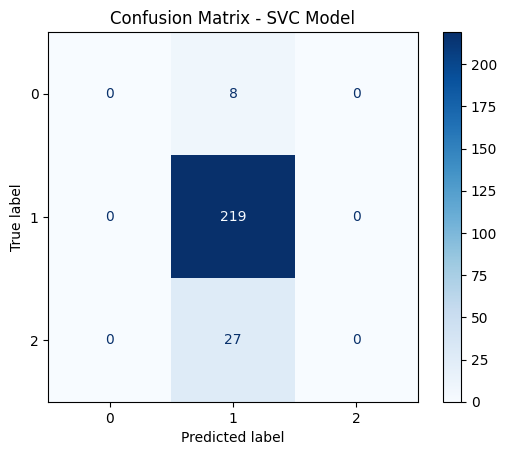

In [ ]:
cm_svc = confusion_matrix(y_test, y_predict_list[1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVC Model')
plt.show()

**Model Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
y_predict_list.append(y_predict)

print(f'Accuracy Score : {accuracy_score(y_test, y_predict)}')

print(f'Confusion Matrix : \n{confusion_matrix(y_test, y_predict)}')

print(f'Classification Report : \n{classification_report(y_test, y_predict, zero_division=0)}')

Accuracy Score : 0.8779527559055118
Confusion Matrix : 
[[  0   8   0]
 [  1 213   5]
 [  0  17  10]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.97      0.93       219
           2       0.67      0.37      0.48        27

    accuracy                           0.88       254
   macro avg       0.52      0.45      0.47       254
weighted avg       0.84      0.88      0.85       254



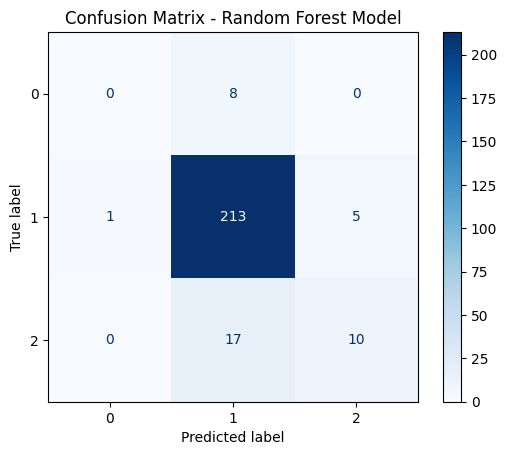

In [ ]:
cm_rf = confusion_matrix(y_test, y_predict_list[2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

### Insight


*   Modelling bertujuan untuk melatih dan mengevaluasi kinerja ketiga model yang berbeda yaitu KNN, SCV dan Random Forest dalam memprediksi kualitas anggur berdasarkan data yang sudah diproses sebelumnya.
*   Model diinisialisasi dengan parameter tertentu.
*   Model dilatih menggunakan data training yang sudah distandardisasi.
*   Model digunakan untuk membuat prediksi pada data testing yang sudah distandardisasi yang kemudian hasil prediksinya di simpan.



## Evaluation

**Perbandingan Accuracy Score Model**

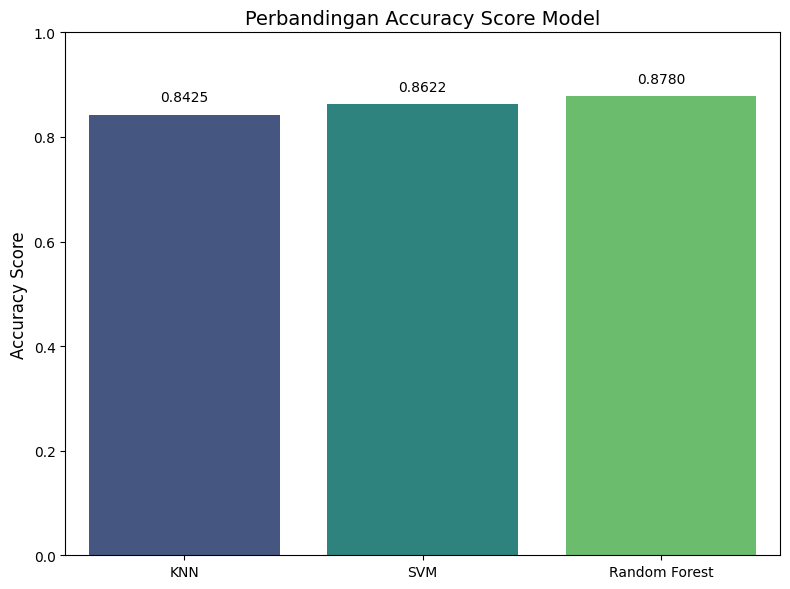


Hasil Accuracy Score:
KNN: 0.8425
SVM: 0.8622
Random Forest: 0.8780


In [ ]:
# Model KNN
y_predict_list = []

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
y_predict_list.append(y_predict)

# Model SVC
from sklearn.svm import  SVC

svc_model = SVC(C=0.1, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
y_predict_list.append(y_predict)

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
y_predict_list.append(y_predict)

# Evaluation
models = ['KNN', 'SVM', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, y_pred) for y_pred in y_predict_list]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Perbandingan Accuracy Score Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)

# Tambahkan teks untuk menampilkan akurasi di bawah plot
for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy + 0.02, f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Menampilkan akurasi di output terpisah juga
print("\nHasil Accuracy Score:")
for model, accuracy in zip(models, accuracy_scores):
    print(f"{model}: {accuracy:.4f}")

Dari ketiga  model yang dibandingkan
* Random Forest Model menunjukkan performa terbaik dalam hal accuracy score, dengan nilai tertinggi yaitu 0.8780.
* SVM Model berada pada urutan kedua dengan accuracy score 0.8622.
* KNN Model dengan accuracy score terendah diantara ketiganya yaitu 0.8425

Maka dari itu, jika matrik utama adalah accuracy, maka Random Forest Model adalah yang paling baik diantara ketiga model ini pada dataset yang diuji.

**Perbandingan Accuracy, Precision, Recall dan F1-Score**

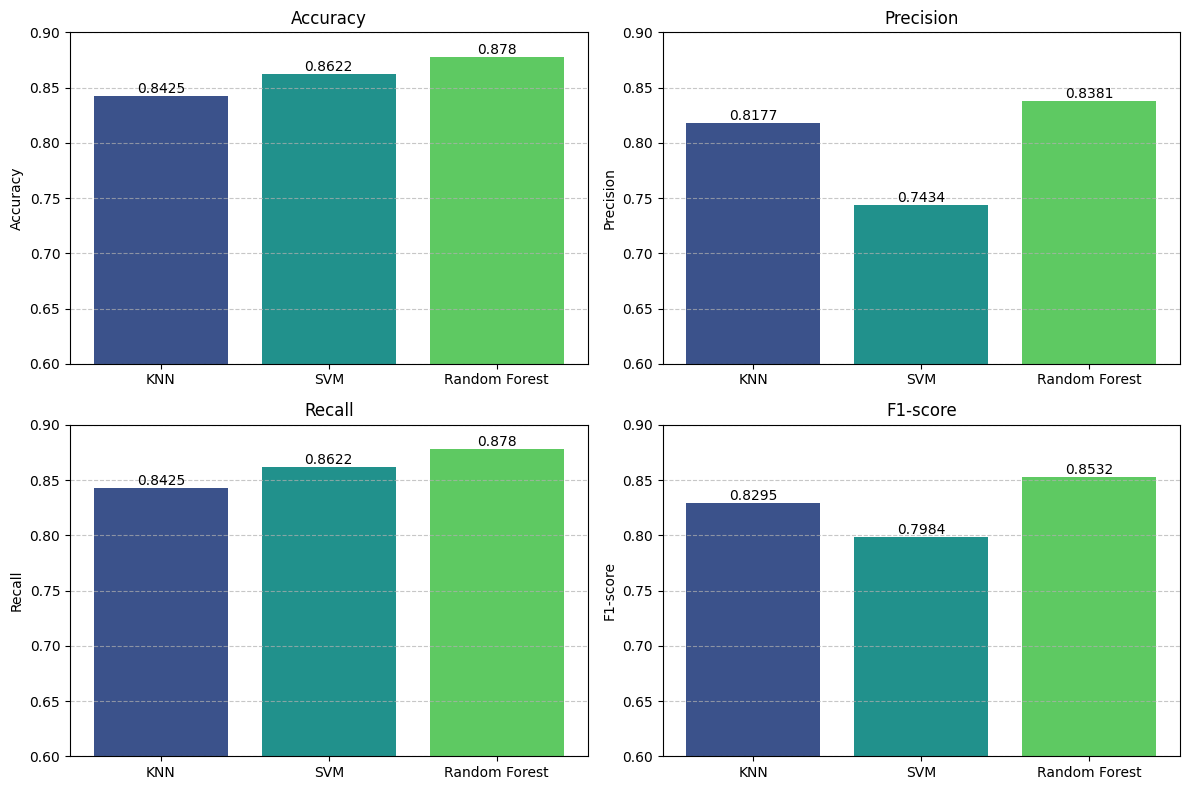

In [ ]:
models = ['KNN', 'SVM', 'Random Forest']

accuracy = [accuracy_score(y_test, y_pred) for y_pred in y_predict_list]
precision = [precision_score(y_test, y_pred, average='weighted', zero_division=0) for y_pred in y_predict_list]
recall = [recall_score(y_test, y_pred, average='weighted', zero_division=0) for y_pred in y_predict_list]
f1 = [f1_score(y_test, y_pred, average='weighted') for y_pred in y_predict_list]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

colors = sns.color_palette('viridis', len(models))

for i, (metric_name, metric_values) in enumerate(metrics.items()):
    ax = axs[i // 2, i % 2]
    bars = ax.bar(models, metric_values, color=colors)
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim(0.6, .9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')

plt.tight_layout()
plt.show()

## Conclusion

Accuracy
*   Random Forest memiliki akurasi tertinggi, kemudian diikuti oleh SVM dan juga KNN.

Precision
*  Random Forest juga menunjukkan precision tertinggi dengan score 0.8381.
*  KNN dengan score 0.8177
*  SVM dengan score 0.7434.

Recall
*   Random Forest juga menunjukkan score Recall tertinggi dengan 0.878.
*   SVM dengan score 0.8622.
*   KNN dengan score 0.8425.

F-1 Score
*   Random Forest menunjukkan score 0.8532.
*   KNN berada di posisi kedua dengan score 0.8295.
*   SVM dengan score 0.7984.

Berdasarkan perbandingan keempat metrik evaluasi, **Random Forest** merupakan model yang paling unggul di antaranya ketiganya. Model ini tidak hanya memiliki akurasi yang tinggi tetapi juga menunjukkan keseimbangaan terbaik antara Precision, Recall dan F-1 score. Maka dari itu, **Random Forest** adalah model terbaik untuk memprediksi kualitas anggur berdasarkan hasil evaluasi yang dilakukan.



